# packages

In [176]:
import pandas as pd
import numpy as np
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler

# read df

In [2]:
df = pd.read_csv('kddcup.data_10_percent_corrected', header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
with open('kddcup.names', 'r') as f:
    lines = f.readlines()
colnames = [i.split(':')[0] for i in lines[1:]]
colnames.append('attack')
colnames

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'attack']

In [5]:
df.columns = colnames
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


# initial data audit

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [7]:
df.attack.value_counts()/len(df)

attack
smurf.              0.568377
neptune.            0.216997
normal.             0.196911
back.               0.004459
satan.              0.003216
ipsweep.            0.002524
portsweep.          0.002105
warezclient.        0.002065
teardrop.           0.001982
pod.                0.000534
nmap.               0.000468
guess_passwd.       0.000107
buffer_overflow.    0.000061
land.               0.000043
warezmaster.        0.000040
imap.               0.000024
rootkit.            0.000020
loadmodule.         0.000018
ftp_write.          0.000016
multihop.           0.000014
phf.                0.000008
perl.               0.000006
spy.                0.000004
Name: count, dtype: float64

In [8]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
duration,494021.0,NaN,NaN,NaN,47.979302,707.746472,0.0,0.0,0.0,0.0,58329.0
protocol_type,494021,3,icmp,283602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
service,494021,66,ecr_i,281400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flag,494021,11,SF,378440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
src_bytes,494021.0,NaN,NaN,NaN,3025.610296,988218.101045,0.0,45.0,520.0,1032.0,693375640.0
dst_bytes,494021.0,NaN,NaN,NaN,868.532425,33040.001252,0.0,0.0,0.0,0.0,5155468.0
land,494021.0,NaN,NaN,NaN,0.000045,0.006673,0.0,0.0,0.0,0.0,1.0
wrong_fragment,494021.0,NaN,NaN,NaN,0.006433,0.134805,0.0,0.0,0.0,0.0,3.0
urgent,494021.0,NaN,NaN,NaN,0.000014,0.00551,0.0,0.0,0.0,0.0,3.0
hot,494021.0,NaN,NaN,NaN,0.034519,0.782103,0.0,0.0,0.0,0.0,30.0


# univariate analysis

## numeric and continuous variables

### duration

<Axes: ylabel='Frequency'>

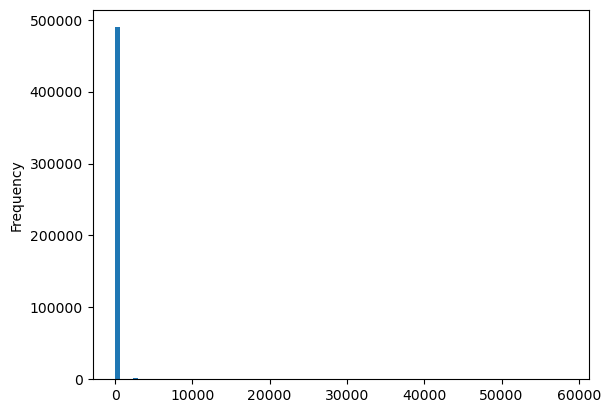

In [9]:
df.duration.plot(kind = 'hist', bins = 100)

<Axes: ylabel='Frequency'>

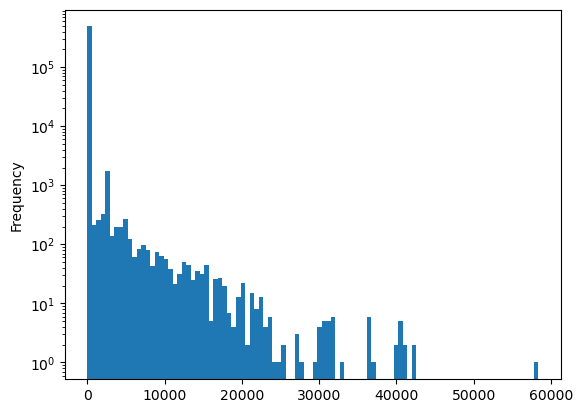

In [10]:
df.duration.plot(kind = 'hist', logy = True, bins = 100)

<Axes: xlabel='percentile'>

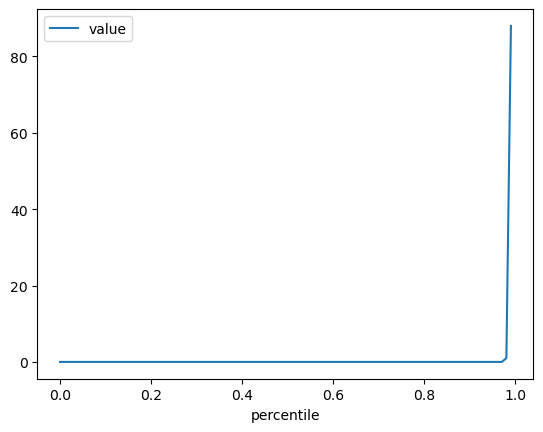

In [11]:
perc_vs_value =[(i, df.duration.quantile(i)) for i in np.arange(0.0, 1.0, 0.01)]
df_pv = pd.DataFrame(perc_vs_value, columns = ['percentile', 'value'])
df_pv.plot(kind = 'line', x = 'percentile', y = 'value')

In [12]:
df_pv.loc[df_pv['value'] > 0, :]

,percentile,value
98,0.98,1.0
99,0.99,88.0


### src_bytes

<Axes: ylabel='Frequency'>

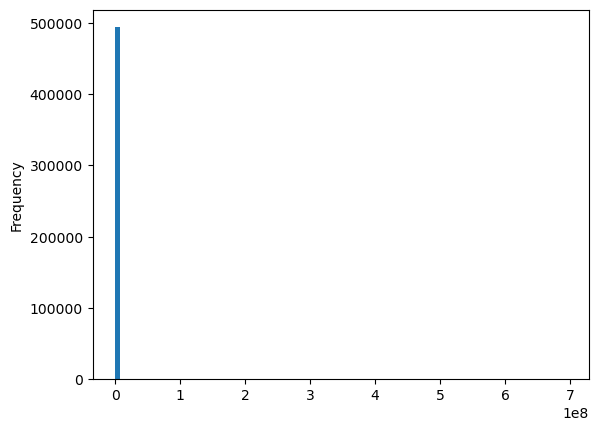

In [13]:
df.src_bytes.plot(kind = 'hist', bins = 100)

<Axes: ylabel='Frequency'>

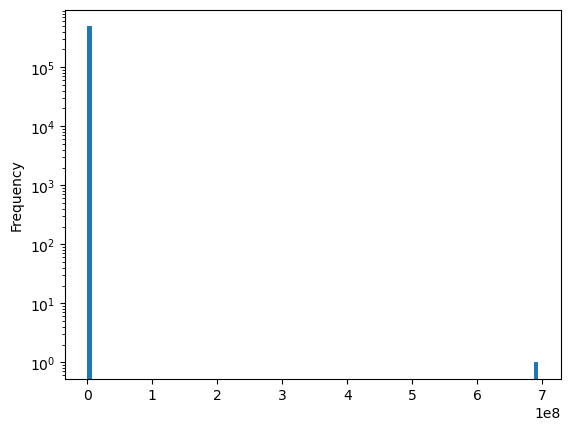

In [14]:
df.src_bytes.plot(kind = 'hist', logy = True, bins = 100)

<Axes: ylabel='Frequency'>

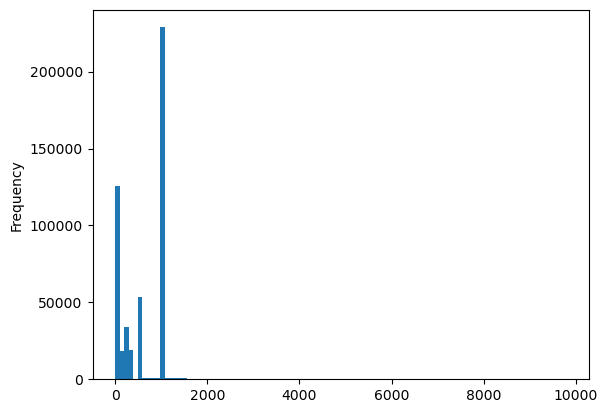

In [15]:
df.loc[df['src_bytes'] <= 10_000, 'src_bytes'].plot(kind = 'hist', bins = 100)

<Axes: ylabel='Frequency'>

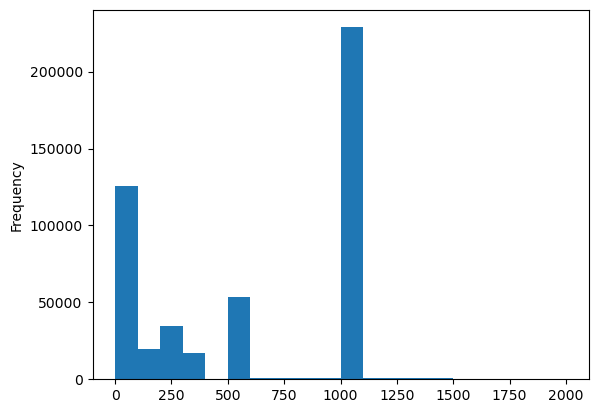

In [16]:
df.loc[df['src_bytes'] <= 2_000, 'src_bytes'].plot(kind = 'hist', bins = 20)

<Axes: ylabel='Density'>

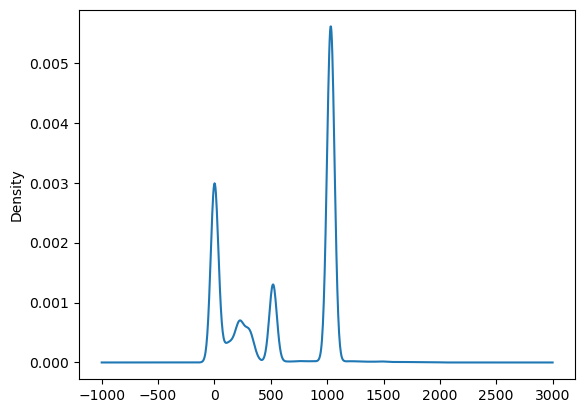

In [17]:
df.loc[df['src_bytes'] <= 2_000, 'src_bytes'].plot(kind = 'kde')

### count

<Axes: ylabel='Frequency'>

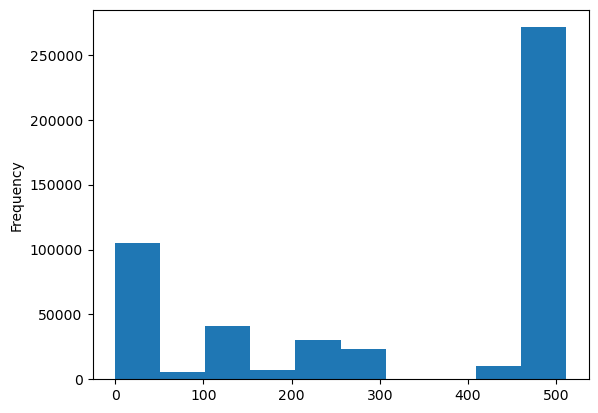

In [18]:
df['count'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

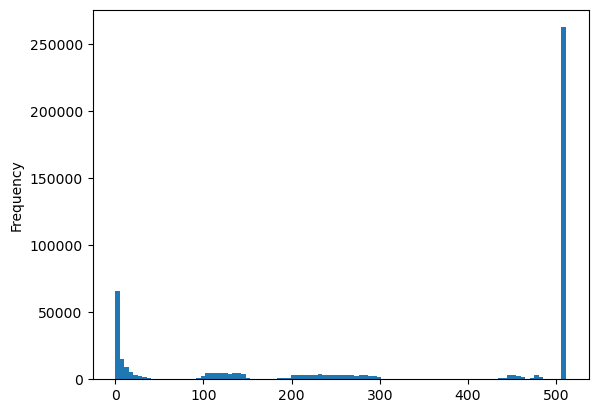

In [19]:
df['count'].plot(kind = 'hist', bins = 100)

<Axes: ylabel='Density'>

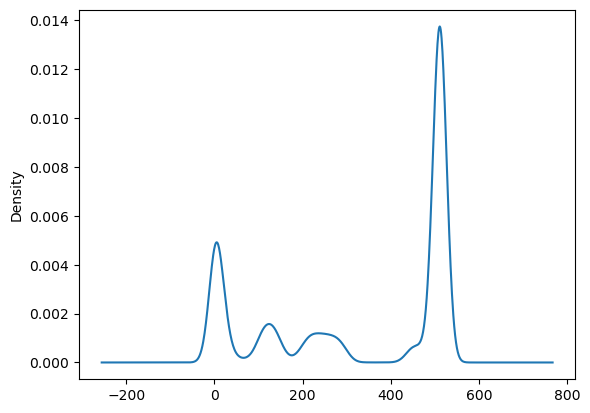

In [20]:
df['count'].plot(kind = 'kde')

### most common distributions

#### normal

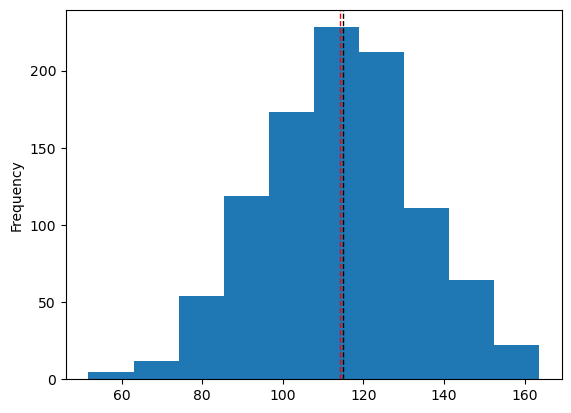

In [21]:
s_normal = pd.Series(np.random.normal(10, 20, 1000), name = 'normal_distribution')
s_normal = s_normal - s_normal.min()*2
s_normal.plot(kind = 'hist')
plt.axvline(s_normal.mean(), color = 'red', linestyle = 'dashed', linewidth = 1)
plt.axvline(s_normal.median(), color = 'black', linestyle = 'dashed', linewidth = 1)

<Axes: ylabel='Density'>

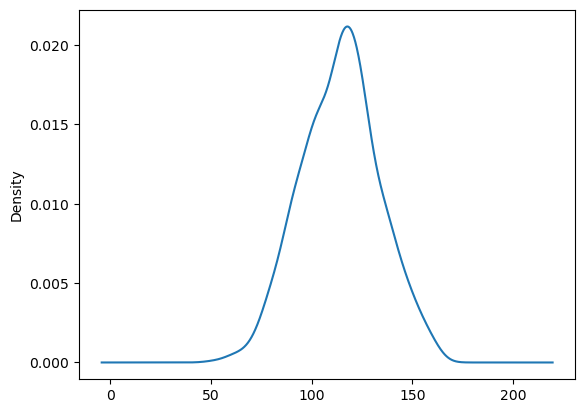

In [22]:
s_normal.plot(kind = 'kde')

In [23]:
s_normal.describe()

count    1000.000000
mean      114.144443
std        19.300043
min        51.779307
25%       100.680659
50%       114.899803
75%       126.478582
max       163.660450
Name: normal_distribution, dtype: float64

#### uniform

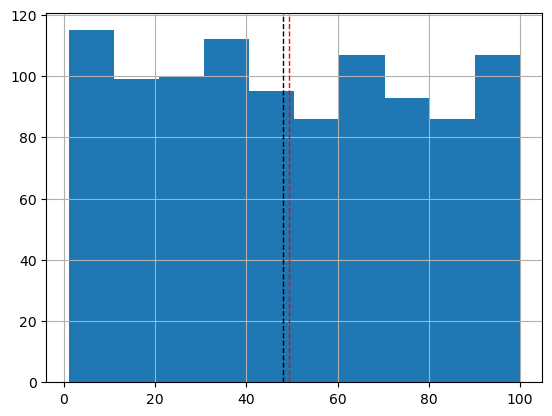

In [24]:
s_uniform = pd.Series(np.random.uniform(1, 100, 1000), name = 'uniform_distribution')
s_uniform.hist()
plt.axvline(s_uniform.mean(), color = 'red', linestyle = 'dashed', linewidth = 1)
plt.axvline(s_uniform.median(), color = 'black', linestyle = 'dashed', linewidth = 1)

In [25]:
s_uniform.describe()

count    1000.000000
mean       49.386830
std        29.111472
min         1.064552
25%        23.967825
50%        48.067590
75%        74.560458
max        99.965310
Name: uniform_distribution, dtype: float64

#### left skewed

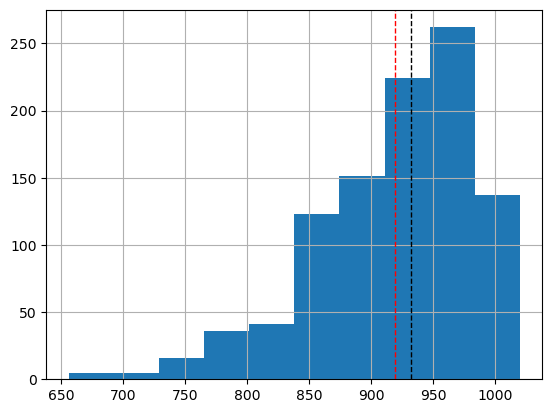

In [26]:
s_left_skewed = pd.Series(skewnorm.rvs(a = -10,loc = 1000, size = 1000, scale = 100), name = 'left_skewed')
s_left_skewed.hist()
plt.axvline(s_left_skewed.mean(), color = 'red', linestyle = 'dashed', linewidth = 1)
plt.axvline(s_left_skewed.median(), color = 'black', linestyle = 'dashed', linewidth = 1)

In [27]:
s_left_skewed.describe()

count    1000.000000
mean      918.797932
std        63.545858
min       656.051292
25%       882.607024
50%       931.976362
75%       967.527171
max      1019.825914
Name: left_skewed, dtype: float64

#### right skewed

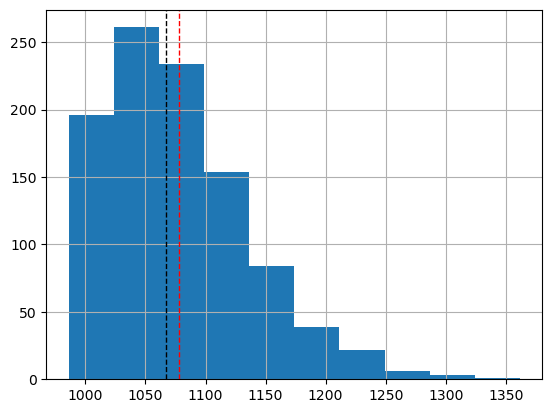

In [28]:
s_right_skewed = pd.Series(skewnorm.rvs(a = 10,loc = 1000, size = 1000, scale = 100), name = 'right_skewed')
s_right_skewed.hist()
plt.axvline(s_right_skewed.mean(), color = 'red', linestyle = 'dashed', linewidth = 1)
plt.axvline(s_right_skewed.median(), color = 'black', linestyle = 'dashed', linewidth = 1)

In [29]:
s_right_skewed.describe()

count    1000.000000
mean     1077.873608
std        58.752957
min       986.240522
25%      1032.292455
50%      1067.185581
75%      1109.820418
max      1361.633002
Name: right_skewed, dtype: float64

#### exponential

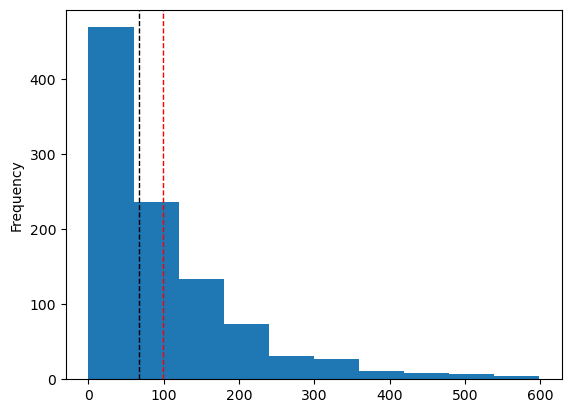

In [30]:
s_exp = pd.Series(np.random.exponential(scale = 100, size = 1000), name = 'exponential_distribution')
s_exp.plot(kind = 'hist')
plt.axvline(s_exp.mean(), color = 'red', linestyle = 'dashed', linewidth = 1)
plt.axvline(s_exp.median(), color = 'black', linestyle = 'dashed', linewidth = 1)

In [31]:
s_exp.describe()

count    1000.000000
mean       98.531721
std       100.811285
min         0.009825
25%        27.699145
50%        67.341371
75%       135.466536
max       598.716258
Name: exponential_distribution, dtype: float64

### most common transformations

#### square

<Axes: ylabel='Frequency'>

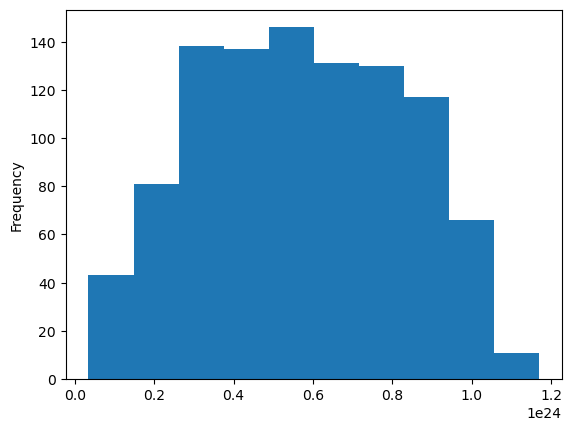

In [32]:
s_square = (s_left_skewed**8)
s_square.plot(kind = 'hist')

<Axes: >

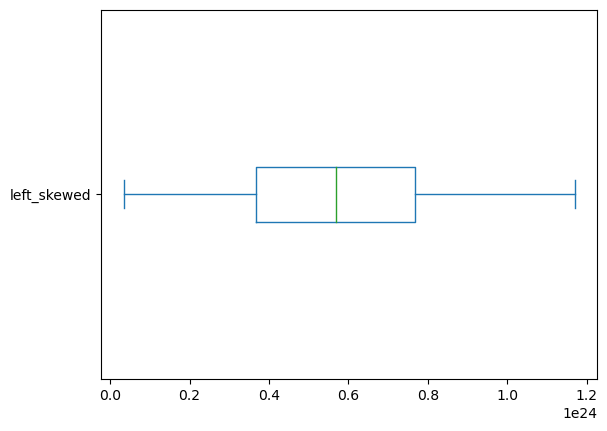

In [33]:
s_square.plot(kind = 'box', vert = False)

#### square root

<Axes: ylabel='Frequency'>

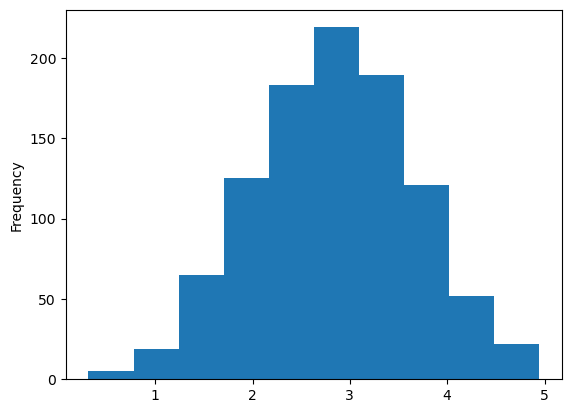

In [34]:
s_sqrt = (s_exp**(1/4))
s_sqrt.plot(kind = 'hist')

<Axes: >

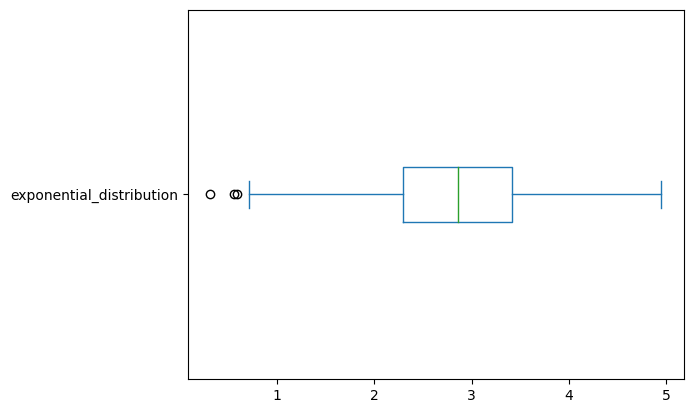

In [35]:
s_sqrt.plot(kind = 'box', vert = False)

#### log

<Axes: ylabel='Frequency'>

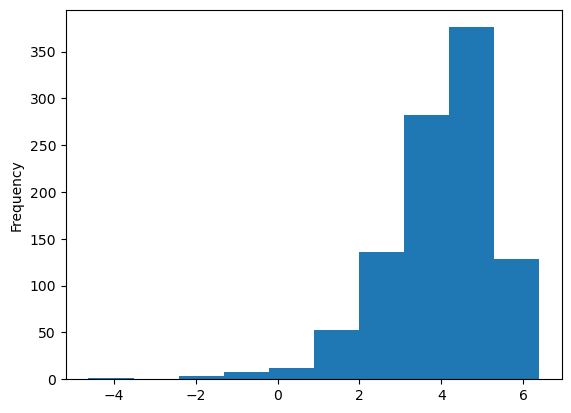

In [36]:
s_exp_log = pd.Series(np.log(s_exp), name = 'log_tranformation')
s_exp_log.plot(kind = 'hist')

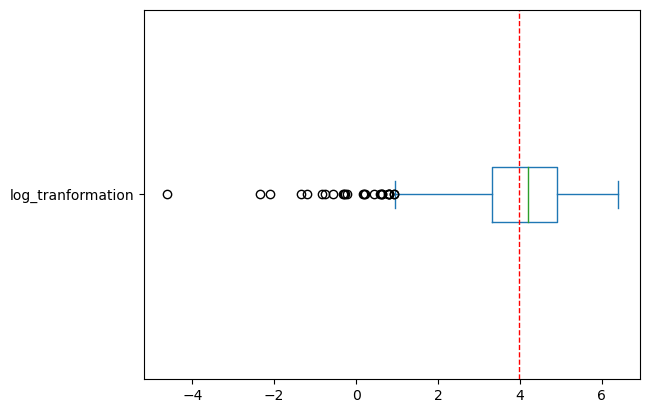

In [37]:
s_exp_log.plot(kind = 'box', vert = False)
plt.axvline(s_exp_log.mean(), color = 'red', linestyle = 'dashed', linewidth = 1)

## categorical variables

#### attack

<Axes: ylabel='attack'>

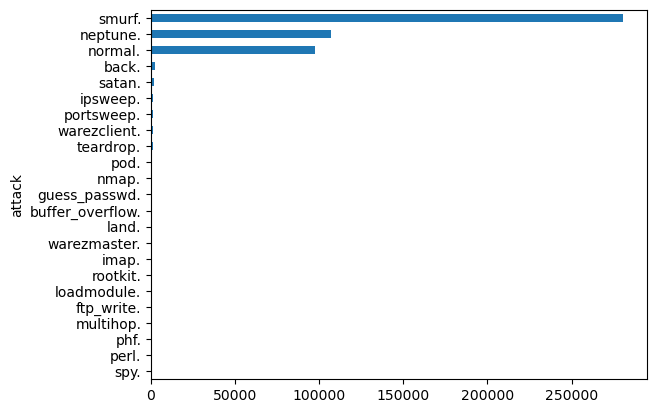

In [38]:
s_attack = df['attack'].value_counts().sort_values(ascending = True)
s_attack.plot(kind = 'barh')

#### protocol_type

<Axes: ylabel='count'>

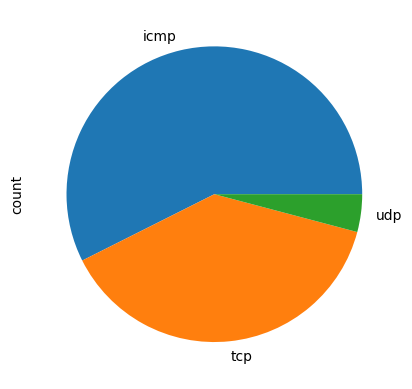

In [39]:
s_attack = df['protocol_type'].value_counts()
s_attack.plot(kind = 'pie')

#### flag

<Axes: xlabel='flag'>

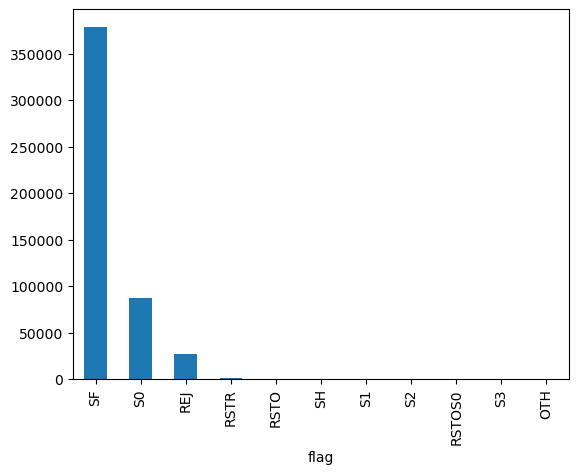

In [40]:
s_attack = df['flag'].value_counts()
s_attack.plot(kind = 'bar')

# bivariatie analysis

## attack vs protocol - cat vs cat

<Axes: xlabel='attack'>

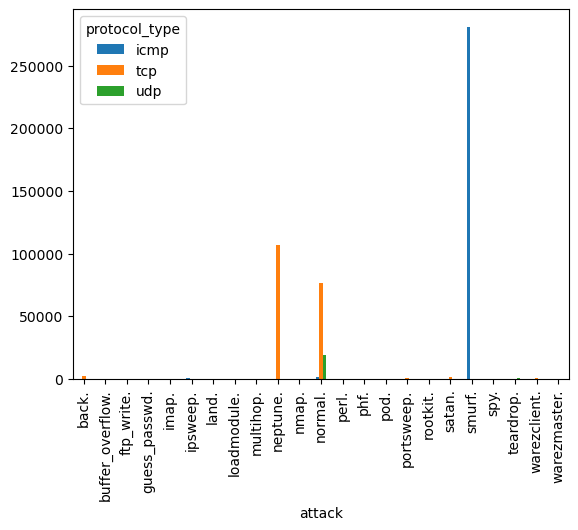

In [41]:
df_cat_cat0 = df.pivot_table(index = 'attack',
                            columns = 'protocol_type',
                            values = 'duration',
                            aggfunc = 'count')
df_cat_cat0.plot(kind = 'bar')

In [42]:
df_cat_cat0_relative = df_cat_cat0.fillna(0).apply(lambda x: x/df_cat_cat0.sum(axis = 1))
df_cat_cat0_relative

protocol_type,icmp,tcp,udp
attack,,,
back.,0.000000,1.000000,0.000000
buffer_overflow.,0.000000,1.000000,0.000000
ftp_write.,0.000000,1.000000,0.000000
guess_passwd.,0.000000,1.000000,0.000000
imap.,0.000000,1.000000,0.000000
ipsweep.,0.924619,0.075381,0.000000
land.,0.000000,1.000000,0.000000
loadmodule.,0.000000,1.000000,0.000000
multihop.,0.000000,1.000000,0.000000


<Axes: xlabel='attack'>

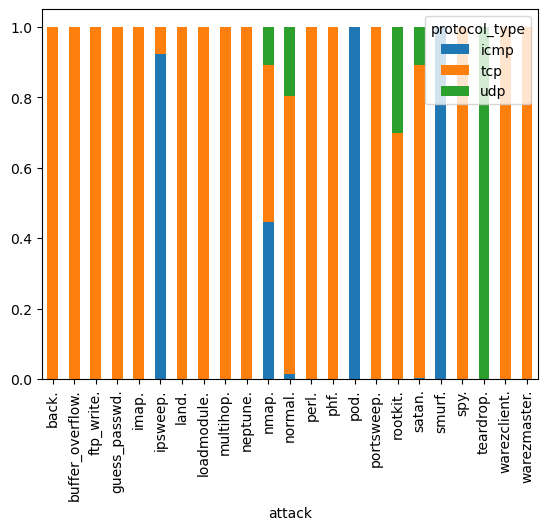

In [43]:
df_cat_cat0_relative.plot(kind = 'bar', stacked = True)

In [44]:
df_cat_cat = df.pivot_table(index = 'flag',
                            columns = 'protocol_type',
                            values = 'duration',
                            aggfunc = 'count')

## flag vs protocol type - cat vs cat

<Axes: xlabel='flag'>

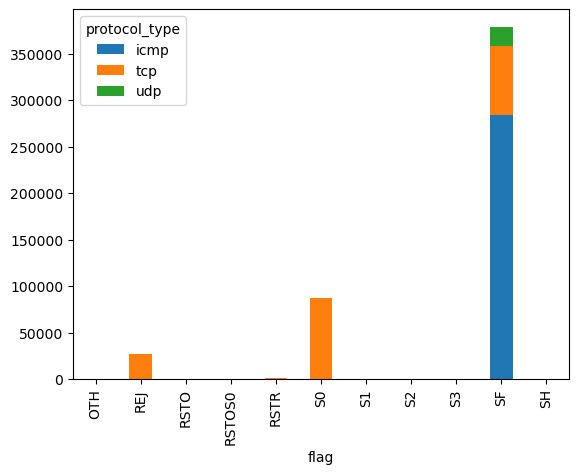

In [45]:
df_cat_cat.plot(kind = 'bar', stacked = True)

## attack vs count binned - cat cat

In [191]:
df['count_bin'] = pd.cut(df['count'], bins = 100)
df_cat_num_binned = df.pivot_table(index = 'count_bin',
                                   columns = 'attack',
                                   values = 'duration',
                                   aggfunc = 'count')


In [192]:
df_cat_num_binned_rel = df_cat_num_binned.fillna(0).apply(lambda x: x/df_cat_num_binned.sum(axis = 1))
df_cat_num_binned_rel.head()

attack,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,...,phf.,pod.,portsweep.,rootkit.,satan.,smurf.,spy.,teardrop.,warezclient.,warezmaster.
count_bin,,,,,,,,,,,,,,,,,,,,,
"(-0.511, 5.11]",0.031475,0.000423,0.000121,0.000802,0.000181,0.018861,0.000302,0.000136,0.000106,0.003464,...,0.00006,0.003085,0.014263,0.000151,0.000318,0.000076,0.00003,0.000681,0.015427,0.000302
"(5.11, 10.22]",0.006848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014162,...,0.00000,0.001330,0.000133,0.000000,0.001662,0.000665,0.00000,0.002992,0.000000,0.000000
"(10.22, 15.33]",0.001612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024817,...,0.00000,0.002149,0.000107,0.000000,0.002364,0.000752,0.00000,0.004835,0.000000,0.000000
"(15.33, 20.44]",0.000712,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037907,...,0.00000,0.003559,0.000356,0.000000,0.004805,0.001424,0.00000,0.007831,0.000000,0.000000
"(20.44, 25.55]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066908,...,0.00000,0.000000,0.000301,0.000000,0.006631,0.001507,0.00000,0.013562,0.000000,0.000000


<Axes: xlabel='count_bin'>

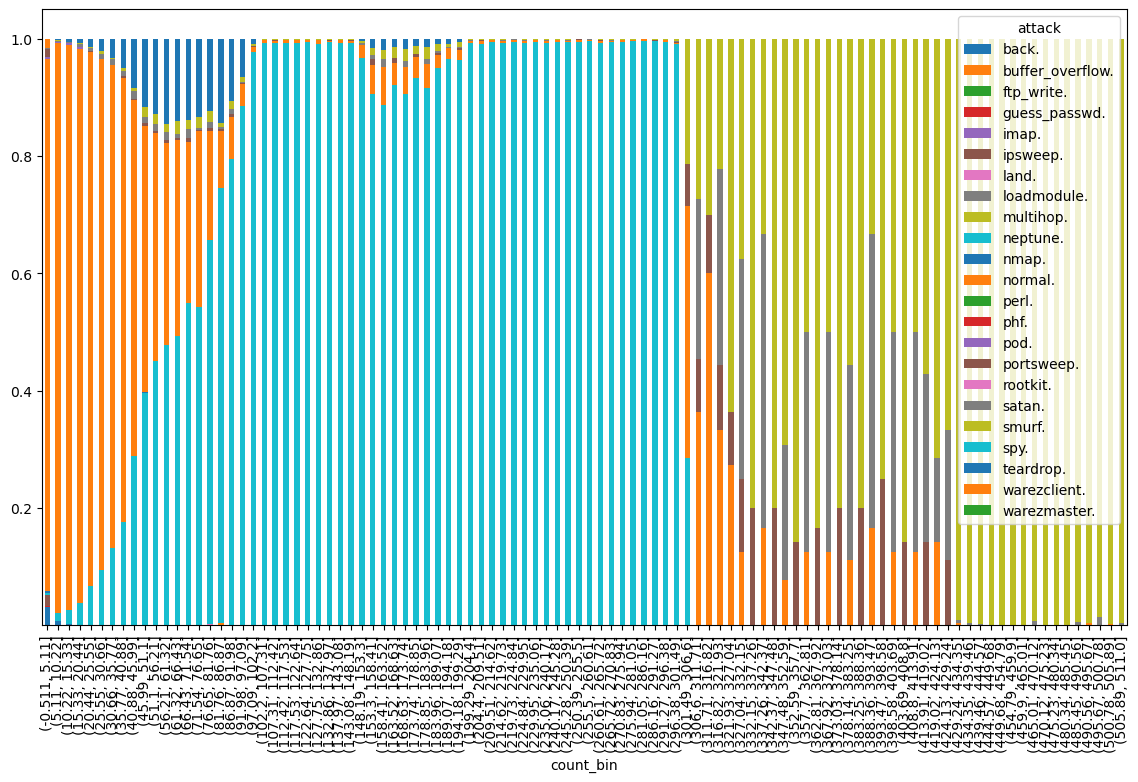

In [193]:
df_cat_num_binned_rel.plot(kind = 'bar', stacked = True, figsize=(14,8))

## cat vs num

### protocol vs count

<Axes: >

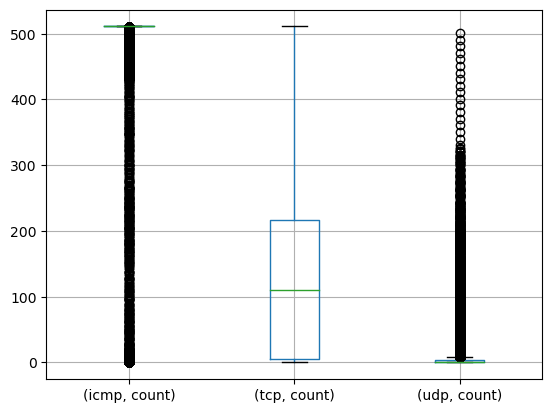

In [46]:
df.groupby('protocol_type').boxplot(column = ['count'], subplots = False)

### attack vs count

<Axes: >

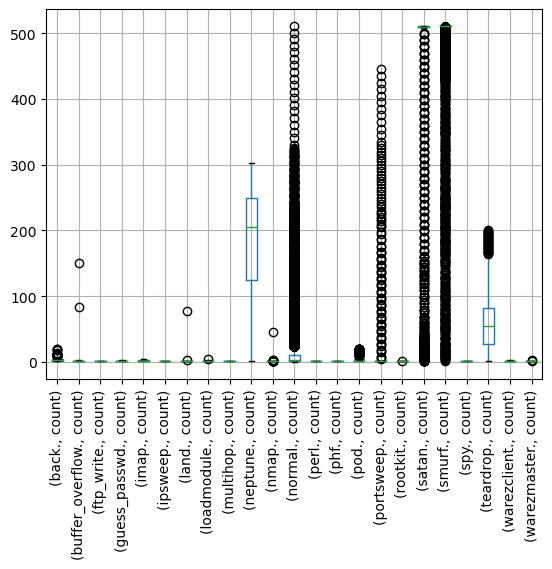

In [47]:
df.groupby('attack').boxplot(column = ['count'], subplots = False, rot = 90)

In [48]:
df.groupby('attack')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
attack,,,,,,,,
back.,2203.0,3.381298,1.651756,1.0,2.0,3.0,4.0,19.0
buffer_overflow.,30.0,9.100000,30.667685,1.0,1.0,1.0,2.0,151.0
ftp_write.,8.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
guess_passwd.,53.0,1.528302,0.540789,1.0,1.0,2.0,2.0,3.0
imap.,12.0,2.000000,1.206045,1.0,1.0,1.5,3.0,4.0
ipsweep.,1247.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
land.,21.0,4.761905,16.786616,1.0,1.0,1.0,1.0,78.0
loadmodule.,9.0,1.666667,1.118034,1.0,1.0,1.0,2.0,4.0
multihop.,7.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


### attack vs srv_count

<Axes: >

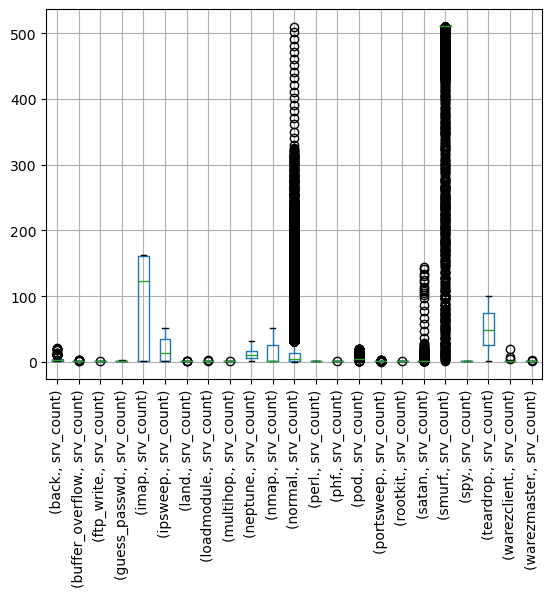

In [49]:
df.groupby('attack').boxplot(column = ['srv_count'], subplots = False, rot = 90)

array([<Axes: title={'center': 'imap.'}, ylabel='Frequency'>,
       <Axes: title={'center': 'ipsweep.'}, ylabel='Frequency'>,
       <Axes: title={'center': 'normal.'}, ylabel='Frequency'>,
       <Axes: title={'center': 'teardrop.'}, ylabel='Frequency'>],
      dtype=object)

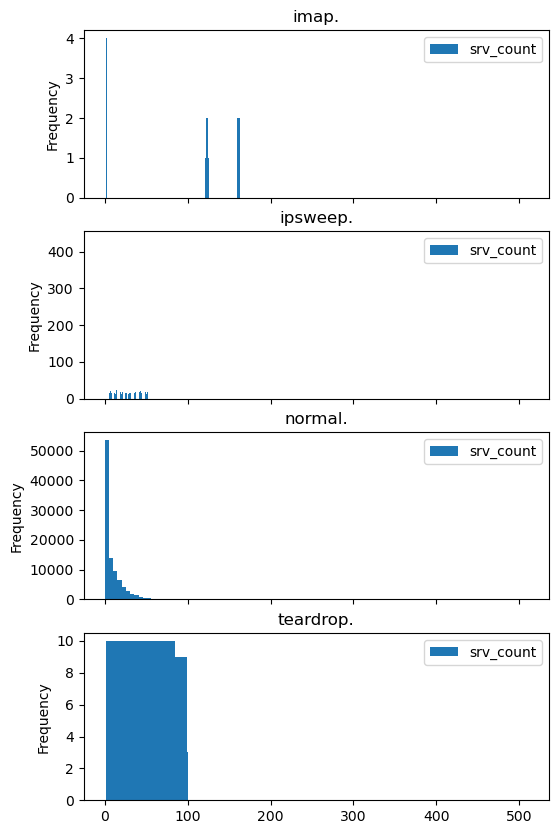

In [50]:
df.loc[df['attack'].isin(['imap.', 'ipsweep.', 'normal.', 'teardrop.']),:].plot(kind = 'hist', column = 'srv_count',
                                                                                               by = 'attack', 
                                                                                               bins = 100, 
                                                                                               figsize = (6, 10), 
                                                                                               sharex = True)

array([<Axes: title={'center': 'neptune.'}, ylabel='Frequency'>,
       <Axes: title={'center': 'normal.'}, ylabel='Frequency'>,
       <Axes: title={'center': 'satan.'}, ylabel='Frequency'>,
       <Axes: title={'center': 'smurf.'}, ylabel='Frequency'>,
       <Axes: title={'center': 'teardrop.'}, ylabel='Frequency'>],
      dtype=object)

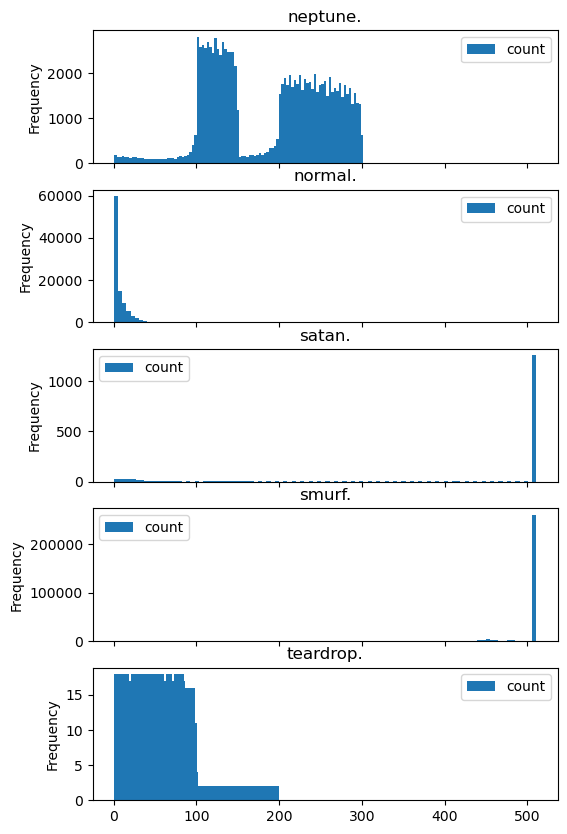

In [178]:
df.loc[df['attack'].isin(['neptune.', 'normal.', 'satan.', 'smurf.', 'teardrop.']),:].plot(kind = 'hist', column = 'count',
                                                                                               by = 'attack', 
                                                                                               bins = 100, 
                                                                                               figsize = (6, 10), 
                                                                                               sharex = True)

### attack vs duration

<Axes: >

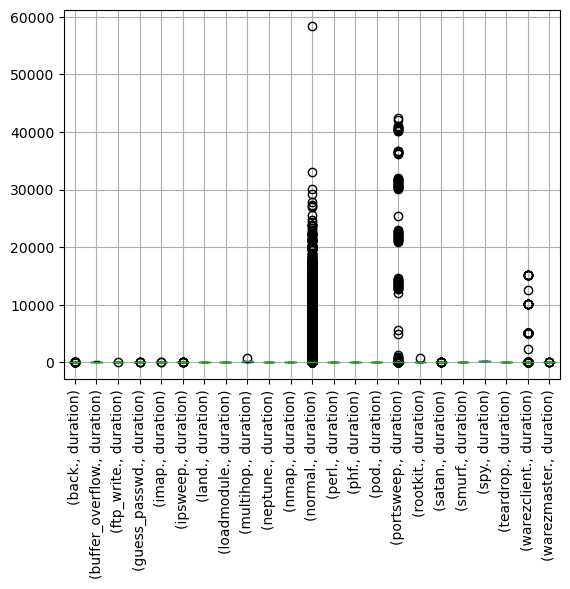

In [51]:
df.groupby('attack').boxplot(column = ['duration'], subplots = False, rot = 90)

(0.0, 1000.0)

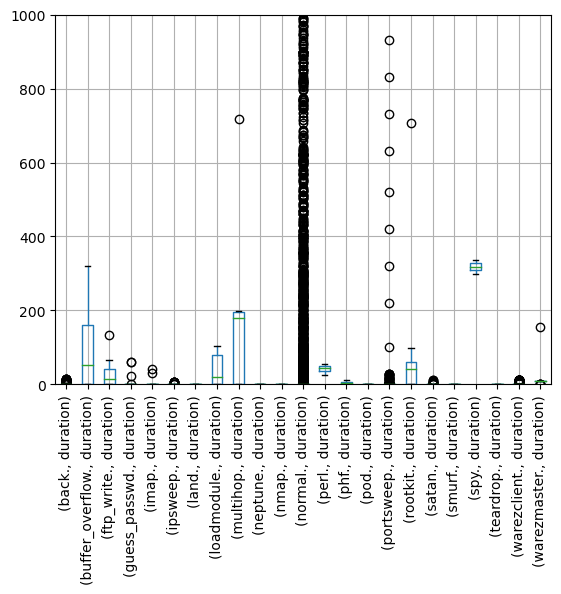

In [52]:
df.groupby('attack').boxplot(column = ['duration'], subplots = False, rot = 90)
plt.ylim(0, 1000) # plt.axis([x_min, x_max, y_min, y_max])

In [53]:
df.groupby('attack')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
attack,,,,,,,,
back.,2203.0,0.128915,1.110062,0.0,0.00,0.0,0.00,14.0
buffer_overflow.,30.0,91.700000,97.514685,0.0,1.75,51.0,161.00,321.0
ftp_write.,8.0,32.375000,47.449033,0.0,0.00,13.0,40.75,134.0
guess_passwd.,53.0,2.716981,11.879811,0.0,0.00,0.0,0.00,60.0
imap.,12.0,6.000000,14.174240,0.0,0.00,0.0,0.00,41.0
ipsweep.,1247.0,0.034483,0.438439,0.0,0.00,0.0,0.00,7.0
land.,21.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
loadmodule.,9.0,36.222222,41.408869,0.0,0.00,21.0,79.00,103.0
multihop.,7.0,184.000000,253.851006,0.0,0.50,179.0,195.00,718.0


## num vs num

### count vs srv_count

<Axes: xlabel='count', ylabel='srv_count'>

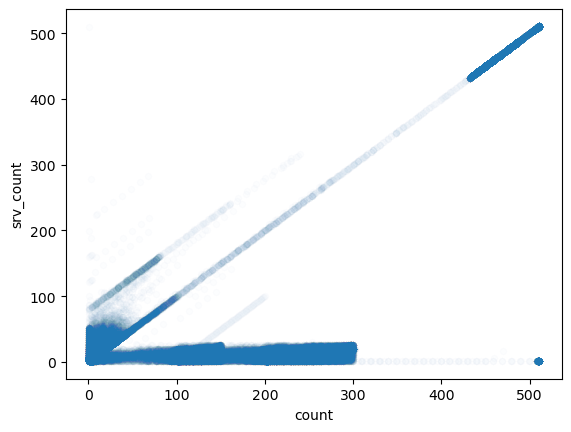

In [54]:
df.plot(kind = 'scatter', x = 'count', y = 'srv_count', alpha = 0.01)

In [55]:
df['count_bin'] = pd.cut(x = df['count'], bins = 20)

<Axes: >

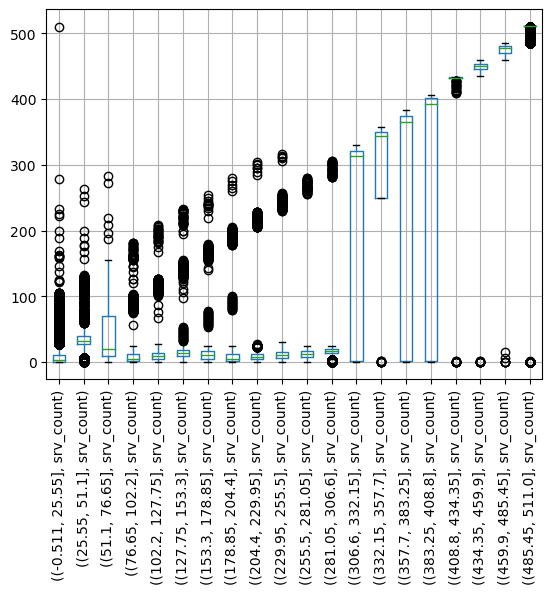

In [56]:
df.groupby('count_bin').boxplot(column = 'srv_count', subplots = False, rot = 90)

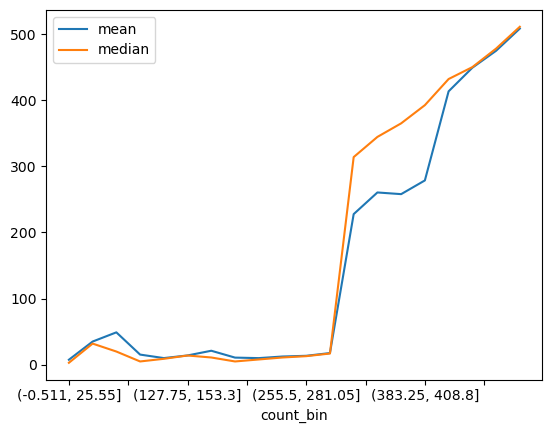

In [57]:
df.groupby('count_bin')['srv_count'].mean().plot()
df.groupby('count_bin')['srv_count'].median().plot()
#df.groupby('count_bin')['srv_count'].apply(lambda x: x.quantile(0.75)).plot(linestyle = 'dashed')
#df.groupby('count_bin')['srv_count'].apply(lambda x: x.quantile(0.25)).plot(linestyle = 'dashed')

plt.legend(['mean', 'median', '75q', '25q'])

In [58]:
# cat num num - per each attack separate plot

# multivariate analysis

## 2x num 1 cat

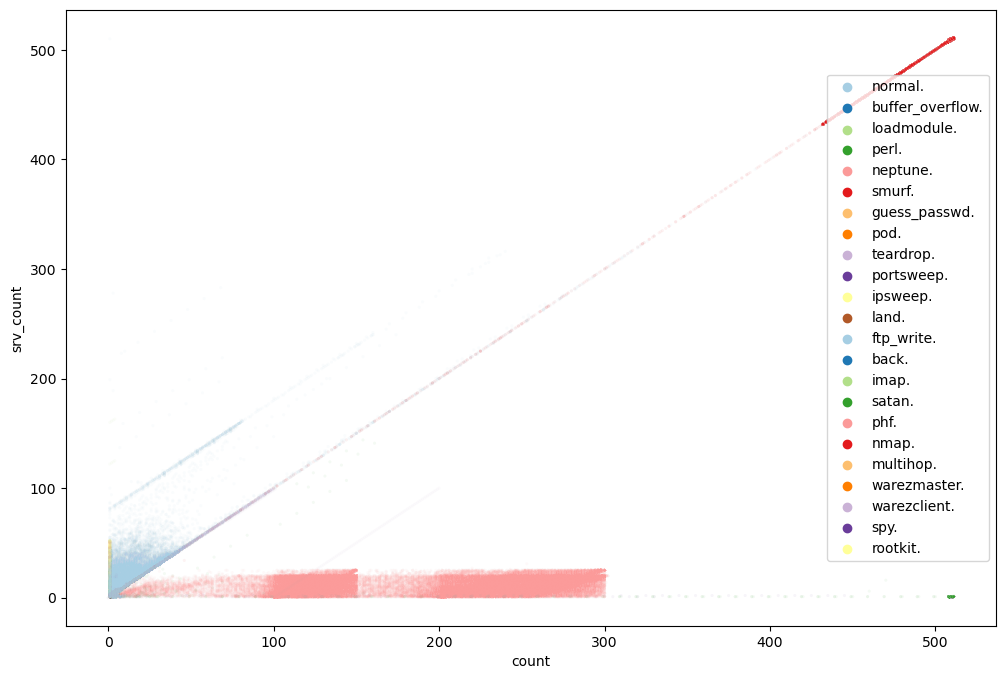

In [59]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x = 'count', y = 'srv_count', alpha = 0.05, s = 5, hue = 'attack', palette="Paired")
plt.legend(loc = 'right')

## 3x num

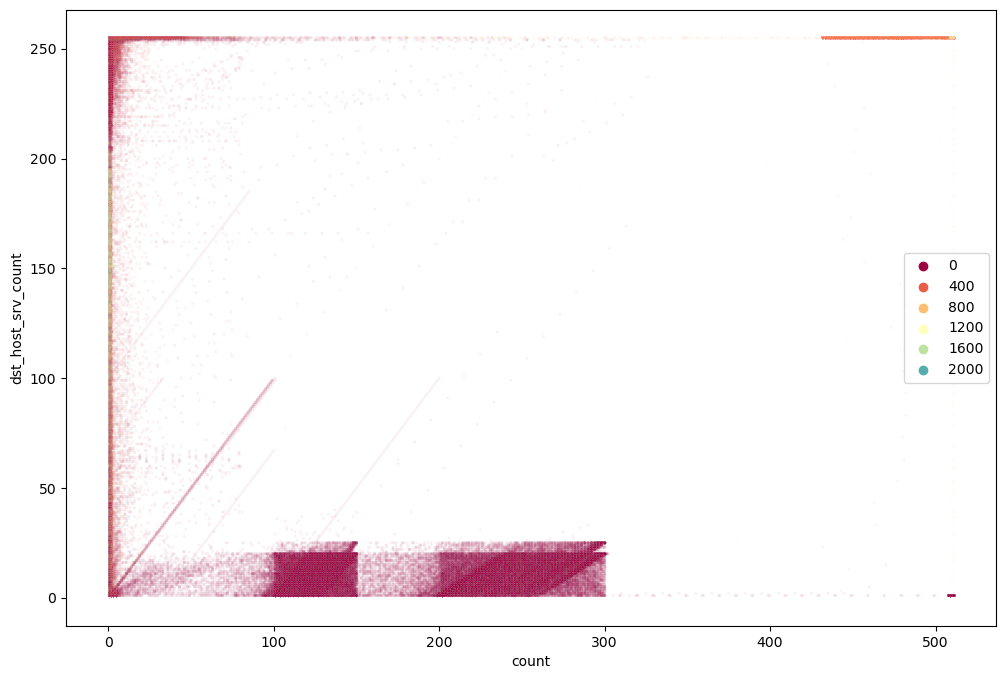

In [60]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = df.loc[df['src_bytes'] < df['src_bytes'].quantile(0.99), :], 
                x = 'count', 
                y = 'dst_host_srv_count', 
                alpha = 0.05, s = 5, 
                hue = 'src_bytes', 
                palette="Spectral")
plt.legend(loc = 'right')

## 3x num 1 cat

<Figure size 1200x800 with 0 Axes>

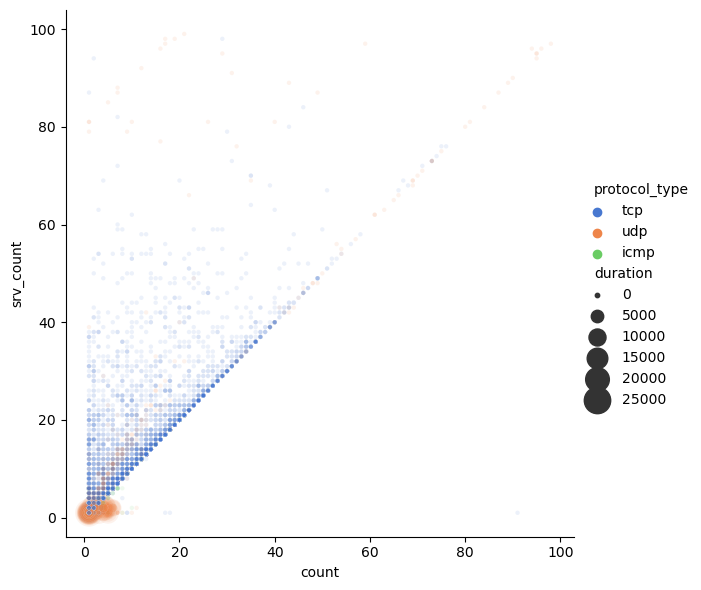

In [61]:
plt.figure(figsize=(12,8))
sns.relplot(x="count", y="srv_count", hue="protocol_type", size="duration",
            sizes=(10, 400), alpha=.1, palette="muted",
            height=6, data=df.loc[(df['count'] < 100) & (df['srv_count'] < 100) & (df['attack'] == 'normal.'),:].sample(10_000))


## 2x cat 1 num

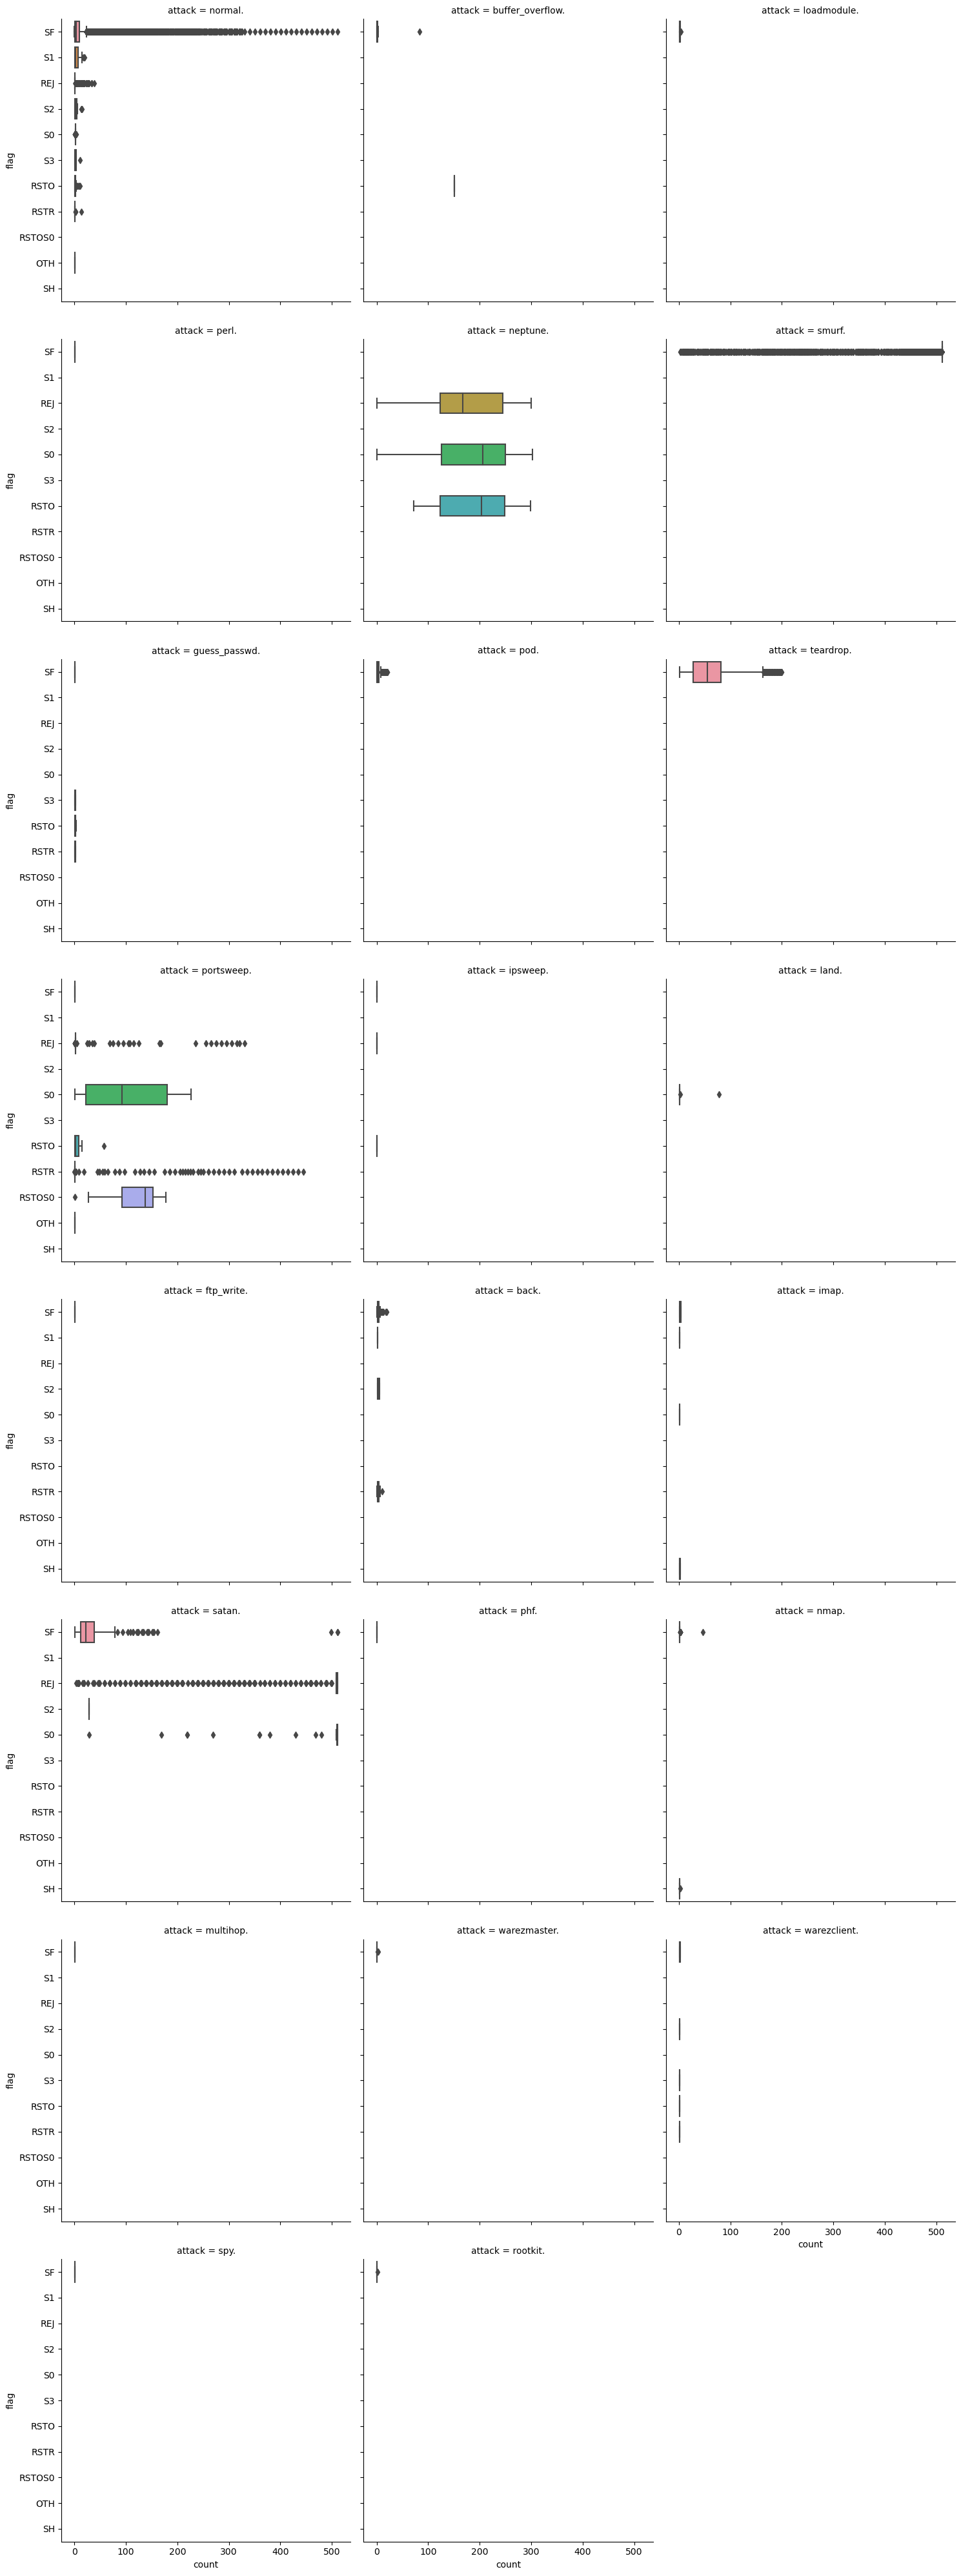

In [62]:
sns.catplot(
    data=df, x='count', y='flag',
    col='attack', kind='box', col_wrap=3, orient = 'h'
)

<Axes: xlabel='attack', ylabel='flag'>

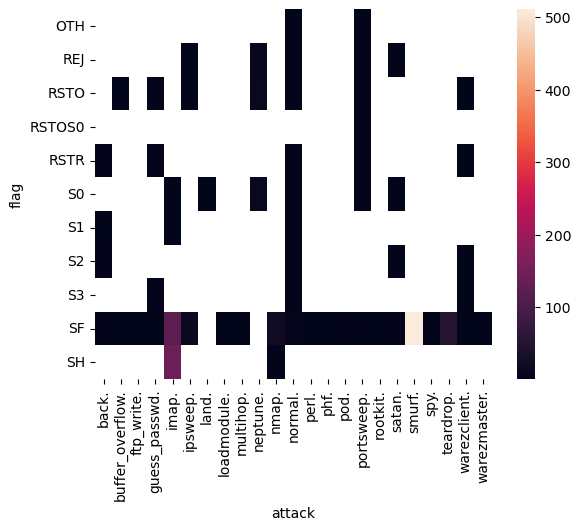

In [63]:
sns.heatmap(df.pivot_table(index = 'flag',
                           columns = 'attack',
                           values = 'srv_count',
                           aggfunc = 'median'))

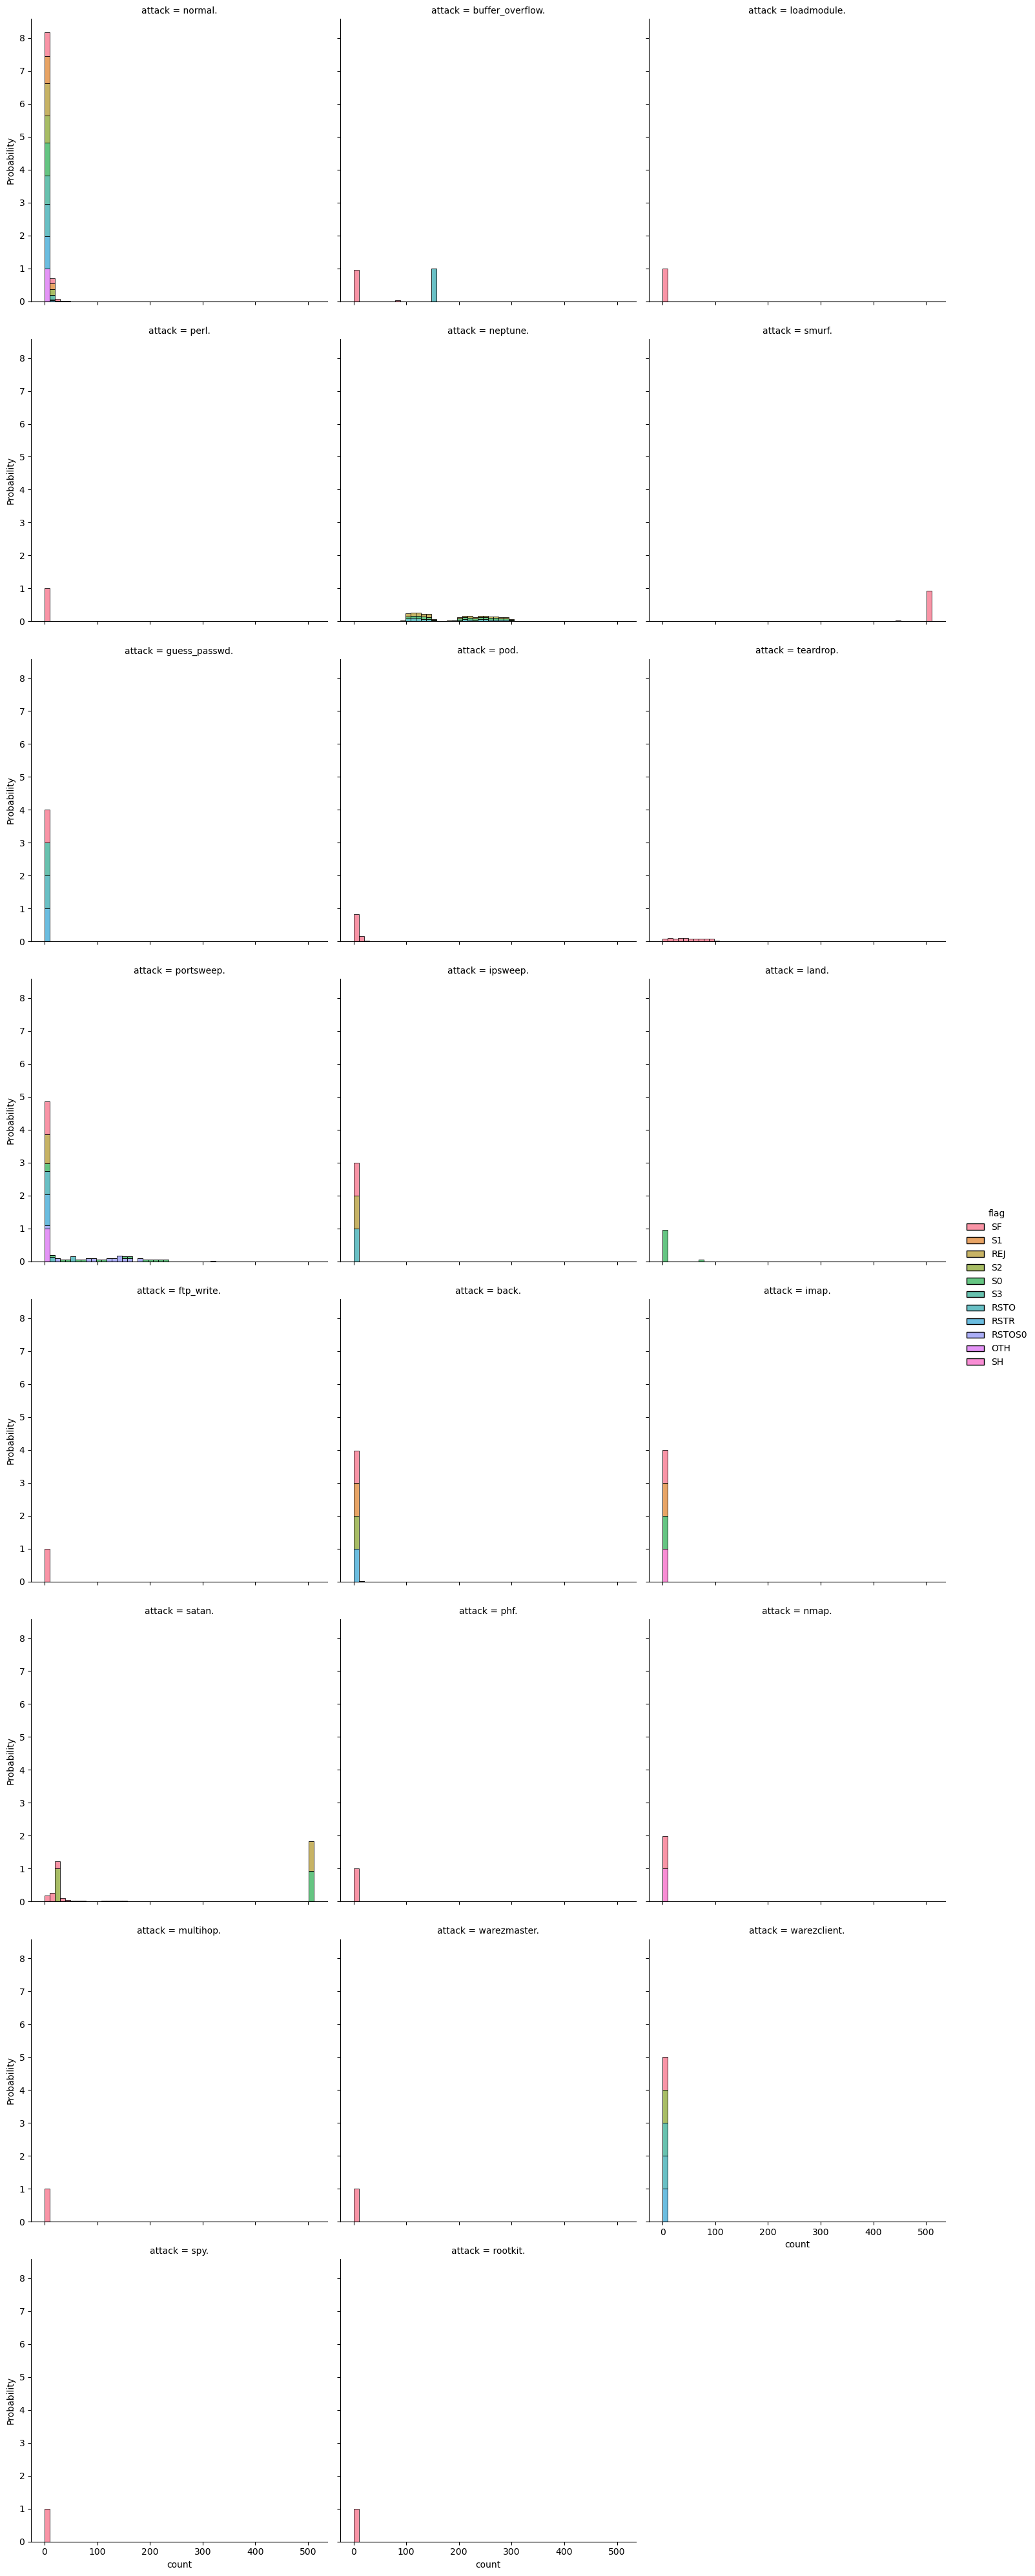

In [64]:
sns.displot(df, x="count", hue="flag", col = 'attack', stat = 'probability', col_wrap = 3, common_norm = False, multiple = 'stack')

# other plots

## scatterplot density

<Axes: xlabel='count', ylabel='srv_count'>

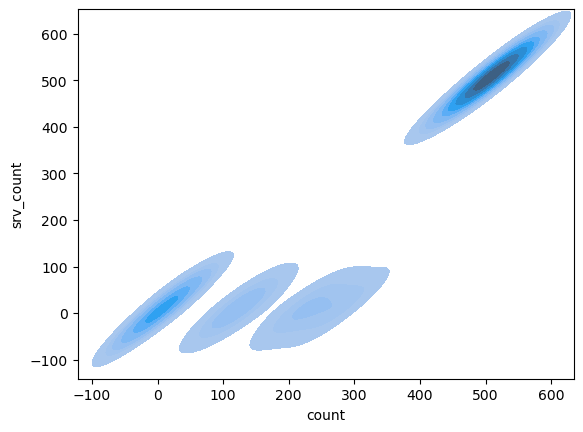

In [65]:
sns.kdeplot(
    data=df.sample(20_000), x="count", y="srv_count", fill=True,
)

<Axes: xlabel='count', ylabel='srv_count'>

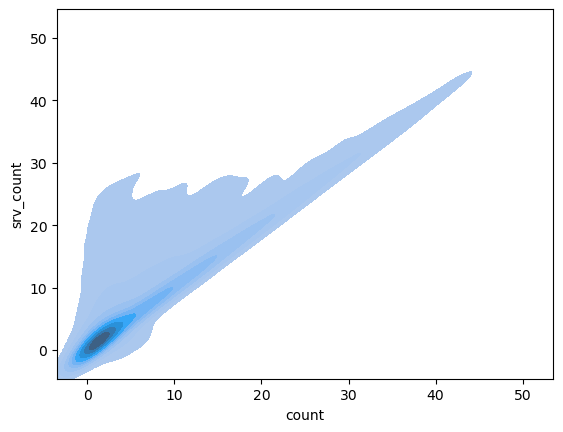

In [66]:
sns.kdeplot(
    data=df.loc[(df['attack'] == 'normal.') & (df['count'] < 50) & (df['srv_count'] < 50),:].sample(20_000), x="count", y="srv_count", fill=True,
)

## scatterplot histogram

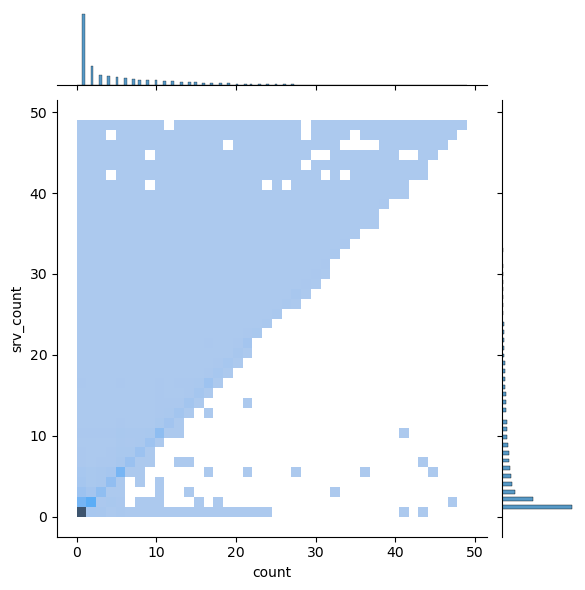

In [119]:
sns.jointplot(data=df.loc[(df['attack'] == 'normal.') & (df['count'] < 50) & (df['srv_count'] < 50),:], x="count", y="srv_count", kind = 'hist', bins = 40)

## scatterplot with LOWESS or LR

<Axes: xlabel='count', ylabel='srv_count'>

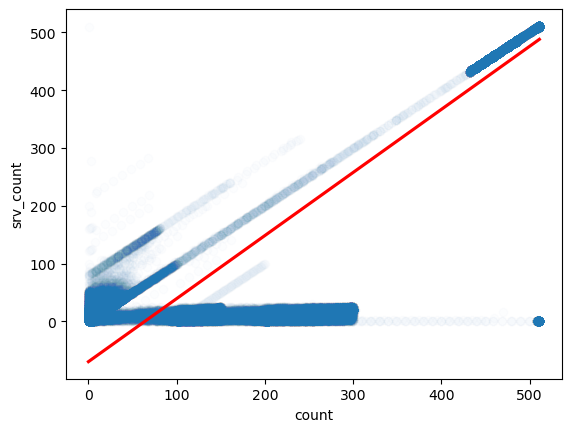

In [68]:
sns.regplot(df, x = 'count', y = 'srv_count', fit_reg = True, line_kws={"color": "red"}, scatter_kws={'alpha':0.01})

<Axes: xlabel='count', ylabel='srv_count'>

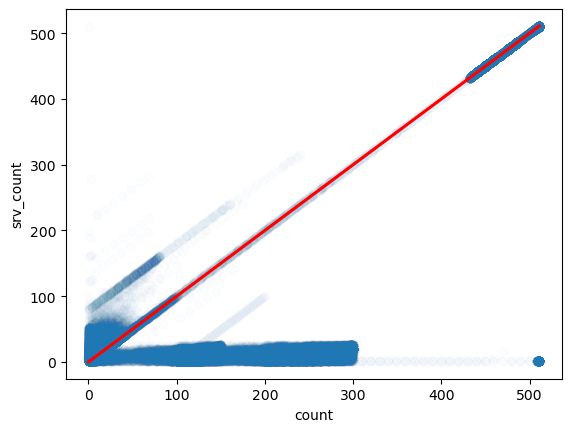

In [69]:
sns.regplot(df, x = 'count', y = 'srv_count', lowess = True, line_kws={"color": "red"}, scatter_kws={'alpha':0.01})

<Axes: xlabel='count', ylabel='srv_count'>

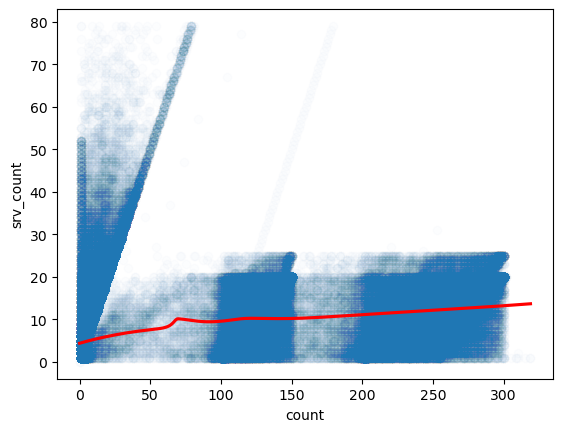

In [70]:
sns.regplot(df.loc[(df['count'] < 320) & (df['srv_count'] < 80), :], 
            x = 'count', 
            y = 'srv_count', 
            lowess = True, line_kws={"color": "red"}, scatter_kws={'alpha':0.01})

## treemaps

In [102]:
df_treemap = df.groupby(['attack', 'flag']).agg({'duration':'count', 'srv_count':'median'}).reset_index().rename(columns = {'duration':'cnt'})
df_treemap.sort_values(by = 'cnt', ascending = False).head()

,attack,flag,cnt,srv_count
50,smurf.,SF,280790,511.0
34,normal.,SF,91709,5.0
23,neptune.,S0,86744,11.0
21,neptune.,REJ,20002,10.0
27,normal.,REJ,5341,1.0


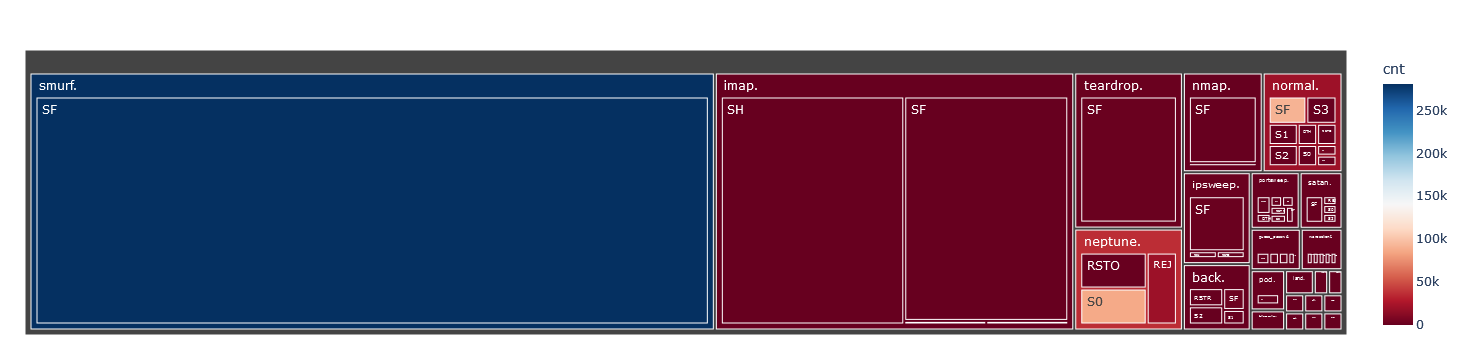

In [103]:
fig = px.treemap(
    df_treemap,
    path = ['attack', 'flag'],
    values = 'srv_count',
    color = 'cnt',
    color_continuous_scale='RdBu',
)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

## violin plots

<Axes: xlabel='flag', ylabel='count'>

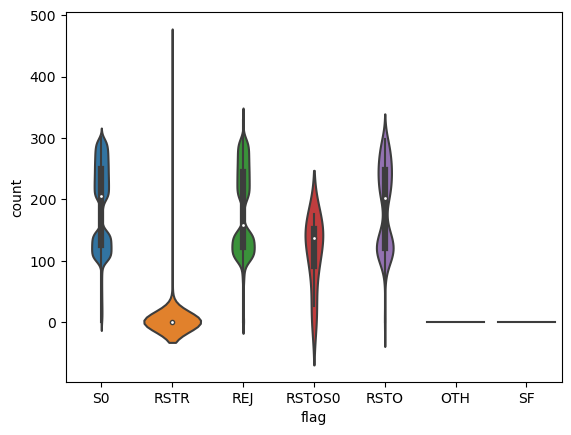

In [114]:
sns.violinplot(data=df.loc[df['attack'].isin(['neptune.', 'portsweep.']), :], x='flag', y='count')

## radar plots

In [155]:
scaler = StandardScaler()
cols_toscale = ['count', 'srv_count', 'src_bytes', 'duration', 'dst_host_same_srv_rate']
df_toscale = df.loc[:, ['attack', 'count', 'srv_count', 'src_bytes', 'duration', 'dst_host_same_srv_rate']].reset_index(drop = True)
df_scaled = pd.DataFrame(scaler.fit_transform(df_toscale[cols_toscale]), columns = cols_toscale)
df_scaled['attack'] = df_toscale['attack']
df_scaled.head()

,count,srv_count,src_bytes,duration,dst_host_same_srv_rate,attack
0,-1.521417,-1.15664,-0.002879,-0.067792,0.599396,normal.
1,-1.521417,-1.15664,-0.002820,-0.067792,0.599396,normal.
2,-1.521417,-1.15664,-0.002824,-0.067792,0.599396,normal.
3,-1.530800,-1.16476,-0.002840,-0.067792,0.599396,normal.
4,-1.530800,-1.16476,-0.002842,-0.067792,0.599396,normal.


In [156]:
df_radar = df_scaled.pivot_table(index = 'attack',
                                 values = cols_toscale,
                                 aggfunc = 'median')
df_radar.reset_index(inplace = True)
df_radar.head()

,attack,count,dst_host_same_srv_rate,duration,src_bytes,srv_count
0,back.,-1.544875,0.599396,-0.067792,0.052129,-1.176939
1,buffer_overflow.,-1.554258,0.599396,0.004268,-0.001480,-1.185058
2,ftp_write.,-1.554258,0.599396,-0.049424,-0.002950,-1.185058
3,guess_passwd.,-1.549566,0.599396,-0.067792,-0.002934,-1.180998
4,imap.,-1.551912,0.599396,-0.067792,-0.003062,-0.687743


In [157]:
df_radar = df_radar.melt(id_vars = 'attack')
df_radar

,attack,variable,value
0,back.,count,-1.544875
1,buffer_overflow.,count,-1.554258
2,ftp_write.,count,-1.554258
3,guess_passwd.,count,-1.549566
4,imap.,count,-1.551912
...,...,...,...
110,smurf.,srv_count,0.885398
111,spy.,srv_count,-1.185058
112,teardrop.,srv_count,-0.990192
113,warezclient.,srv_count,-1.185058


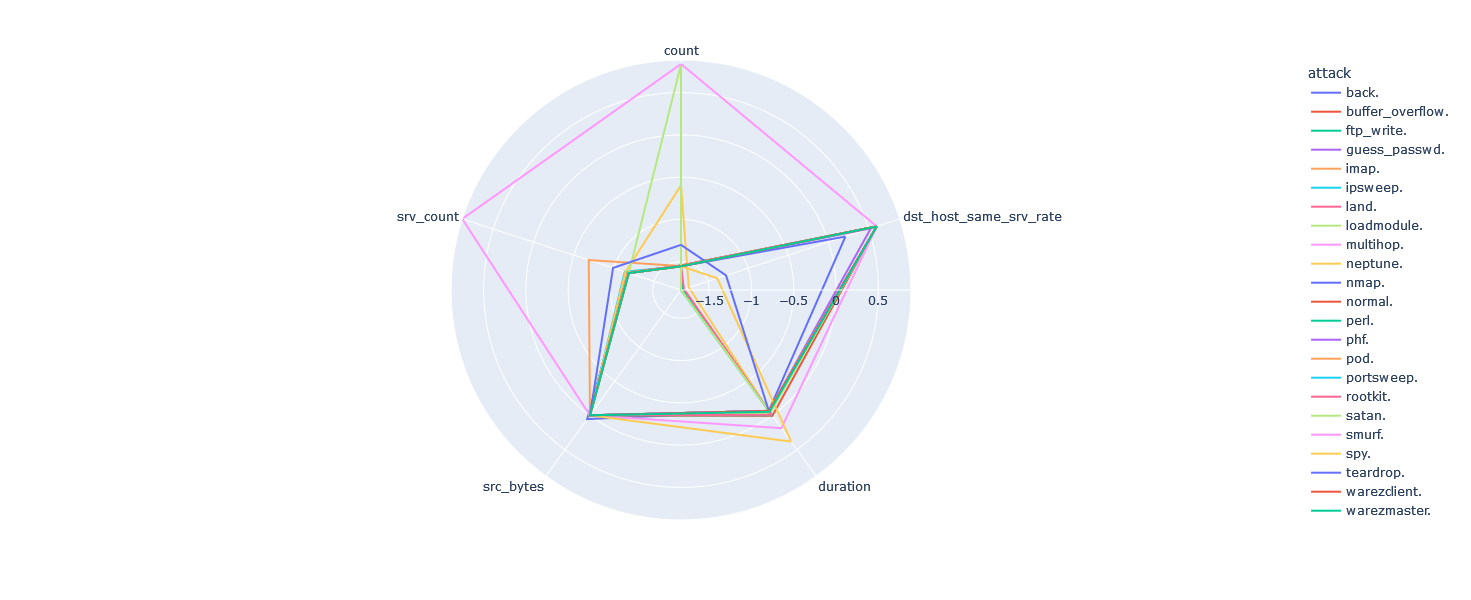

In [175]:
fig = px.line_polar(df_radar, r="value", theta="variable", color="attack", line_close=True,  width=700, height=600)
fig.show()